# **자기주도PJT - 기본과제**

**Req-1. basic.ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요**

In [1]:
print('Hello World')

Hello World


**Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.**

In [5]:
import datetime

#total_seconds(): timedelta에 포함된 기간을 초로 변환

print(datetime.timedelta(days=7).total_seconds())

604800.0


**Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요**
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

# Visualization:Linked Brushing in Altair

In [7]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

# Camera Capture

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


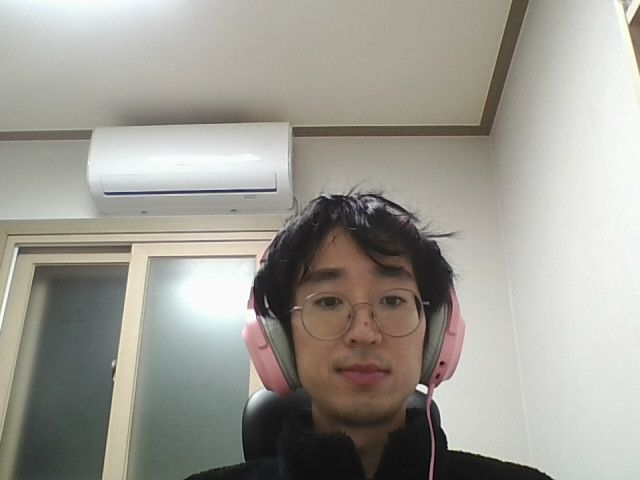

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Javascript to Python communication

In [13]:
import IPython
from google.colab import output

def Concat(a, b):
  # Use display.JSON to transfer a structured result.
  return IPython.display.JSON({'result': ' '.join((a, b))})

output.register_callback('notebook.Concat', Concat)

In [14]:
%%javascript
(async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Concat', // The callback name.
    ['hello', 'world!'], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'];
  document.querySelector("#output-area").appendChild(document.createTextNode(text.result));
})();

<IPython.core.display.Javascript object>

In [15]:
import IPython
from google.colab import output

display(IPython.display.HTML('''
    The items:
    <br><ol id="items"></ol>
    <button id='button'>Click to add</button>
    <script>
      document.querySelector('#button').onclick = () => {
        google.colab.kernel.invokeFunction('notebook.AddListItem', [], {});
      };
    </script>
    '''))

def add_list_item():
  # Use redirect_to_element to direct the elements which are being written.
  with output.redirect_to_element('#items'):
    # Use display to add items which will be persisted on notebook reload.
    display(IPython.display.HTML('<li> Another item</li>'))

output.register_callback('notebook.AddListItem', add_list_item)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import IPython
import uuid
from google.colab import output

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html

def do_something():
  print('here')

InvokeButton('click me', do_something)

here
here
here


**Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다.**

In [17]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [18]:
with open('/gdrive/My Drive/foo.txt','w') as f:
    
    f.write('Hello World')

!cat '/gdrive/My Drive/foo.txt'

Hello World

**Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.**   
 ☞ https://colab.research.google.com/notebooks/gpu.ipynb


Req.5의 실행결과는 다음과 같습니다.

```
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.276999473999993
GPU (s):
0.03921133900000484
GPU speedup over CPU: 83x
```


**Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요. (난이도 쉬움)**

https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

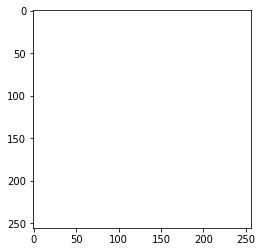

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#이미지 버퍼 생성
buffer = np.full((256,256,3), 255,np.uint8)

#이미지 버퍼 가공

#이미지 버퍼 출력
plt.imshow(buffer)
plt.show()

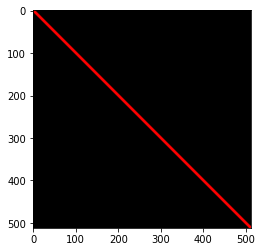

In [22]:
import numpy as np
import cv2 as cv

#create black image

img = np.zeros((512,512,3), np.uint8)

#draw a diagonal red line 5px

cv.line(img,(0,0),(511,511),(255,0,0),5)

#show image
plt.imshow(img)
plt.show()

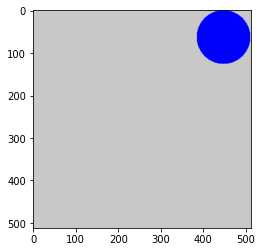

In [23]:
#create buffer

img = np.full((512,512,3),200,np.uint8)

#create circle
cv.circle(img,(447,63),63,(0,0,255),-1)

#show image
plt.imshow(img)
plt.show()

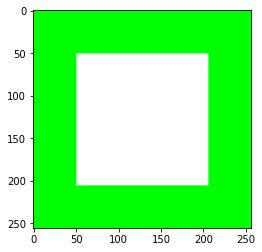

In [42]:
#create buffer

img = np.full((256,256,3),255,np.uint8)

#draw rectangle
cv.rectangle(img,(256,0),(0,256),(0,255,0),100)

#show image
plt.imshow(img)
plt.show()

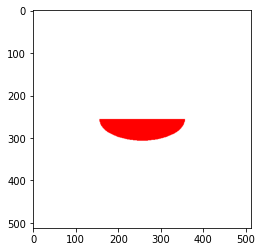

In [43]:
#create buffer

img = np.full((512,512,3),255,np.uint8)

#draw ellipse

cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

#show image

plt.imshow(img)
plt.show()

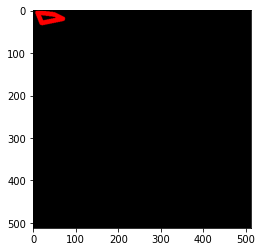

In [48]:
#create buffer

img = np.zeros((512,512,3),np.uint8)

#create polygon

points = np.array([[10,5],[20,30],[70,20],[50,10]],np.int32)
points = points.reshape((-1,1,2))

cv.polylines(img,[points],True,(255,0,0),10)

#show image
plt.imshow(img)
plt.show()

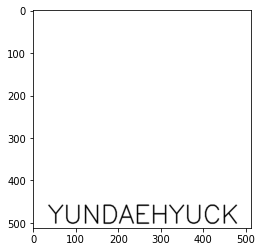

In [55]:
#adding text

img = np.full((512,512,3),255,np.uint8)

#create text
font = cv.FONT_HERSHEY_SIMPLEX

cv.putText(img,'YUNDAEHYUCK',(35,500),font,2,(0,0,0),2,cv.LINE_AA)

#show image
plt.imshow(img)
plt.show()